In [1]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../Data_Files/Raw_Data/users_ratings_img_20users_final.csv')
df.head(5)

,UserID,Title,Img_Path,Img_File_Name,Year,Description,Directors,Stars,Viewer_Advisory,Duration,...,Color2,Color3,Brightness,Contrast,Saturation,Hue,Texture,Entropy,Noise,Colorfulness
0,ur3223254,The Making of 'West Side Story',https://m.media-amazon.com/images/M/MV5BOTU3Mj...,ur3223254_1.jpg,1985,"A documentary which shows, in great detail, th...",['Christopher Swann'],"['Leonard Bernstein', 'Kiri Te Kanawa', 'José ...",Not Rated,1 hr 29 min,...,"[197.87346221441118, 183.76742823667269, 147.5...","[132.63642065649162, 67.00731758310732, 66.696...",28.345112,1.0,0.483944,0.286751,0.095318,5.033725,2607.615256,0.151818
1,ur3223254,West Side Story,https://m.media-amazon.com/images/M/MV5BMzQ5ZD...,ur3223254_2.jpg,2021,"An adaptation of the 1957 musical, West Side S...",['Steven Spielberg'],"['Ansel Elgort', 'Rachel Zegler', 'Ariana DeBo...",PG-13,2 hr 36 min,...,"[192.77984157334174, 164.10516252390104, 156.2...","[26.031522737713317, 18.571141479099744, 27.59...",56.452657,1.0,0.387084,0.630909,0.117362,7.215298,2937.235783,0.105448
2,ur3223254,Supernova,https://m.media-amazon.com/images/M/MV5BNDc0Y2...,ur3223254_3.jpg,2020,Sam and Tusker are traveling across England in...,['Harry Macqueen'],"['Colin Firth', 'Stanley Tucci', 'Pippa Haywoo...",R,1 hr 35 min,...,"[237.4783657256323, 234.21676833593577, 225.24...","[192.77753168450687, 143.20118124769283, 122.0...",129.423365,1.0,0.336827,0.314486,0.064798,7.568517,5491.649326,0.239863
3,ur3223254,The Many Saints of Newark,https://m.media-amazon.com/images/M/MV5BYmQzNm...,ur3223254_4.jpg,2021,Witness the making of Tony Soprano. The story ...,['Alan Taylor'],"['Alessandro Nivola', 'Leslie Odom Jr.', 'Jon ...",R,2 hr,...,"[227.23344529750602, 227.37020153551038, 227.3...","[123.22488696677817, 87.70277177118118, 88.950...",59.251703,1.0,0.147507,0.146196,0.076623,6.669963,6147.526922,0.116340
4,ur3223254,Never Look Away,https://m.media-amazon.com/images/M/MV5BNGUwYT...,ur3223254_5.jpg,2018,German artist Kurt Barnert has escaped East Ge...,['Florian Henckel von Donnersmarck'],"['Tom Schilling', 'Sebastian Koch', 'Paula Bee...",R,3 hr 9 min,...,"[215.23204559848062, 185.4957568081067, 188.98...","[129.6641665391094, 101.77100872493492, 107.88...",95.750548,1.0,0.333741,0.614238,0.074675,7.714849,4981.923137,0.151493


In [3]:
df2 = pd.read_csv('../Data_Files/Raw_Data/users_reviews_20users_final.csv')
df2.head(5)

,UserID,Title,Year,Review_Title,Review
0,ur117926588,Missing,2023,A solid follow-up to Searching that shows ther...,Having lost her father (Tim Griffin) to a brai...
1,ur117926588,Operation Fortune: Ruse de guerre,2023,Guy Ritchie returns to the spy genre with a fu...,"Following a theft of a device known as ""The Ha..."
2,ur117926588,Max,2015,A well made dog adventure story with considera...,"In the Kandahar Province of Afghanistan, Belig..."
3,ur117926588,The Night Agent,2023–,A fun intrigue rich conspiracy thriller anchor...,One year after thwarting a terrorist attack on...
4,ur117926588,New Nightmare,1994,Wes Craven celebrates the 10 year anniversary ...,10 years after the first A Nightmare on Elm St...


# Exploratory Data Analysis

In [4]:
print("Data has " + str(df.shape[0]) + " observations and " + str(df.shape[1]) + " columns")

Data has 37809 observations and 25 columns


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37809 entries, 0 to 37808
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UserID           37809 non-null  object 
 1   Title            37809 non-null  object 
 2   Img_Path         37809 non-null  object 
 3   Img_File_Name    37809 non-null  object 
 4   Year             37809 non-null  object 
 5   Description      37695 non-null  object 
 6   Directors        36620 non-null  object 
 7   Stars            37697 non-null  object 
 8   Viewer_Advisory  36795 non-null  object 
 9   Duration         37564 non-null  object 
 10  Genre            37805 non-null  object 
 11  Votes            37806 non-null  float64
 12  Movie_Rating     37809 non-null  float64
 13  User_Rating      37809 non-null  int64  
 14  Color1           37809 non-null  object 
 15  Color2           37809 non-null  object 
 16  Color3           37809 non-null  object 
 17  Brightness  

In [6]:
df.columns

Index(['UserID', 'Title', 'Img_Path', 'Img_File_Name', 'Year', 'Description',
       'Directors', 'Stars', 'Viewer_Advisory', 'Duration', 'Genre', 'Votes',
       'Movie_Rating', 'User_Rating', 'Color1', 'Color2', 'Color3',
       'Brightness', 'Contrast', 'Saturation', 'Hue', 'Texture', 'Entropy',
       'Noise', 'Colorfulness'],
      dtype='object')

In [7]:
df.describe()

,Votes,Movie_Rating,User_Rating,Brightness,Contrast,Saturation,Hue,Texture,Entropy,Noise,Colorfulness
count,3.780600e+04,37809.000000,37809.000000,37809.000000,37809.000000,37809.000000,37809.000000,37809.000000,37809.000000,37809.000000,37809.000000
mean,1.371496e+05,6.898149,6.971806,104.655792,0.946438,0.405571,0.331458,0.094024,6.994761,4561.055709,0.235817
std,2.515578e+05,1.062380,1.979195,48.851728,0.223480,0.184363,0.163350,0.034004,0.846158,2203.847287,0.155102
min,7.000000e+00,1.300000,0.000000,5.563030,0.000000,0.000000,0.000000,0.002700,0.966268,71.019894,0.000000
25%,5.897000e+03,6.300000,6.000000,65.635527,1.000000,0.268612,0.195458,0.069173,6.661160,2951.325312,0.123827
50%,3.724100e+04,7.000000,7.000000,98.691252,1.000000,0.398722,0.311823,0.092720,7.255895,4324.729673,0.202009
75%,1.523168e+05,7.600000,8.000000,140.220872,1.000000,0.534287,0.457252,0.117191,7.588927,5862.239966,0.311522
max,2.720970e+06,10.000000,10.000000,245.261239,1.000000,0.981936,0.935092,0.252358,7.979096,14082.969733,1.000000


In [8]:
# create boolean mask of NaN values
nan_mask = df.isna()

# count number of True values in each column
nan_count = nan_mask.sum(axis=0)

# print number of NaN values in each column
print(nan_count/len(df))

UserID             0.000000
Title              0.000000
Img_Path           0.000000
Img_File_Name      0.000000
Year               0.000000
Description        0.003015
Directors          0.031448
Stars              0.002962
Viewer_Advisory    0.026819
Duration           0.006480
Genre              0.000106
Votes              0.000079
Movie_Rating       0.000000
User_Rating        0.000000
Color1             0.000000
Color2             0.000000
Color3             0.000000
Brightness         0.000000
Contrast           0.000000
Saturation         0.000000
Hue                0.000000
Texture            0.000000
Entropy            0.000000
Noise              0.000000
Colorfulness       0.000000
dtype: float64


### Distribution of User Ratings

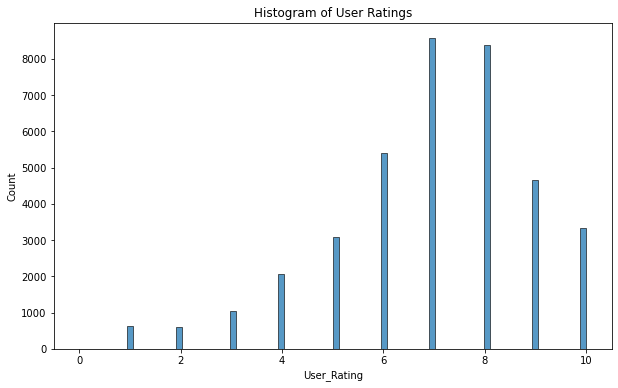

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='User_Rating')
plt.title('Histogram of User Ratings')
plt.show()

### Correlation between Numerical Columns

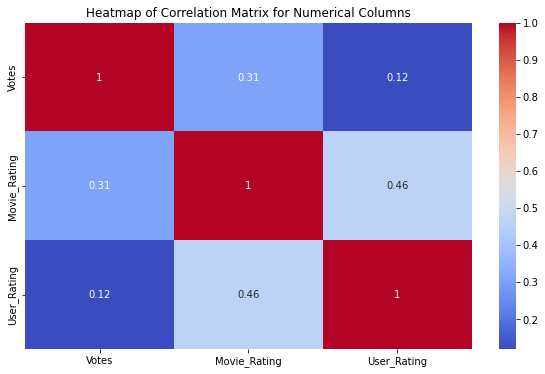

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
numerical_columns = ['Year', 'Duration', 'Votes', 'Movie_Rating', 'User_Rating']
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix for Numerical Columns')
plt.show()

### Movie Ratings vs. User Ratings: A Comparative Analysis by UserID

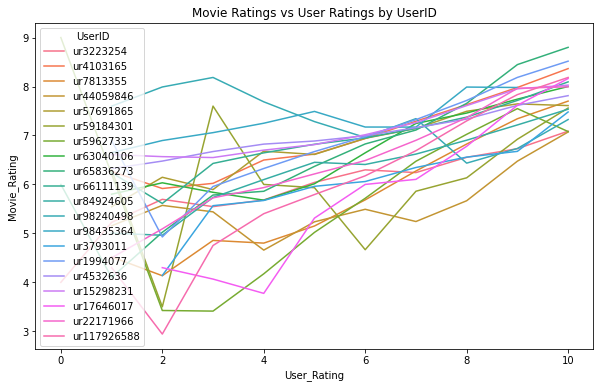

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data = df, y = 'Movie_Rating', x = 'User_Rating', hue = 'UserID', ci=None)
plt.title('Movie Ratings vs User Ratings by UserID')
plt.show()

# when movies are rated below 5, users tend to rate them lower than the average rating
# when movies are rated above 5, users tend to rate them higher than the average rating

### Average User Ratings by Decade for Different Users

In [12]:
df_decades = df[['Year', 'User_Rating', 'UserID']].copy()
df_decades['Year'] = df_decades['Year'].str.replace('–', '-').str.split('-').str[0]
df_decades['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df_decades['Decade'] = (df_decades['Year'] // 10) * 10
df_decades = df_decades.groupby(['UserID', 'Decade'])['User_Rating'].mean().reset_index()

df_decades['Decade'] = pd.to_datetime(df_decades['Decade'], format='%Y')
df_decades = df_decades.set_index('Decade')
df_decades = df_decades.reset_index()
df_decades.head()

,Decade,UserID,User_Rating
0,1920-01-01,ur117926588,9.000000
1,1930-01-01,ur117926588,8.250000
2,1940-01-01,ur117926588,7.966667
3,1950-01-01,ur117926588,7.800000
4,1960-01-01,ur117926588,7.159420


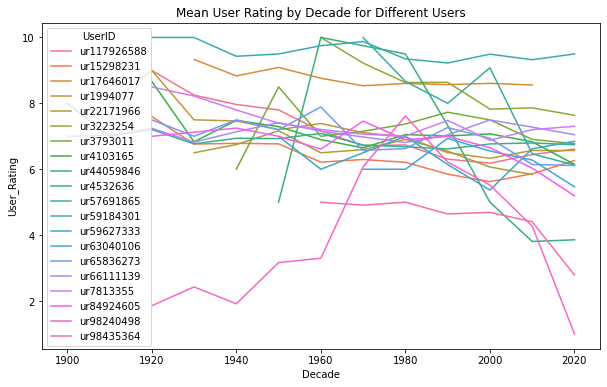

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=df_decades, x='Decade', y='User_Rating', hue = 'UserID', ci=None)
plt.title('Mean User Rating by Decade for Different Users')
plt.show()

# decrease in average user ratings over time

### User Ratings by User ID

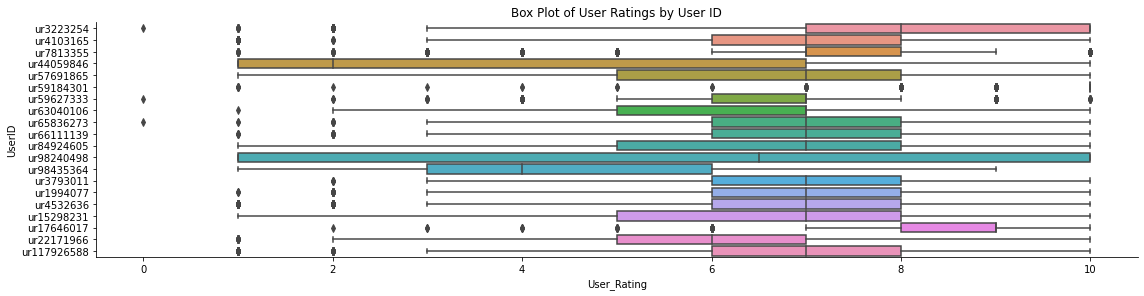

In [14]:
sns.catplot(data=df, x='User_Rating', y='UserID', kind='box', height=4, aspect=4)
plt.title('Box Plot of User Ratings by User ID')
plt.show()

### Number of Movies and Average User Ratings by Viewer Advisory

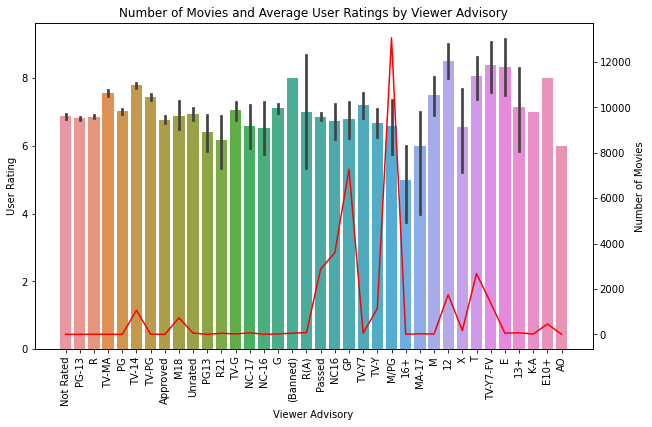

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df, x='Viewer_Advisory', y='User_Rating', ax=ax)
ax2 = ax.twinx()

sns.lineplot(data=df.groupby('Viewer_Advisory')['Title'].count().reset_index(),
             x='Viewer_Advisory', y='Title', ax=ax2, color='red')

ax.set_ylabel('User Rating')
ax2.set_ylabel('Number of Movies')
ax.set_xlabel('Viewer Advisory')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Number of Movies and Average User Ratings by Viewer Advisory')
plt.show()

### Pie chart of Movie Ratings

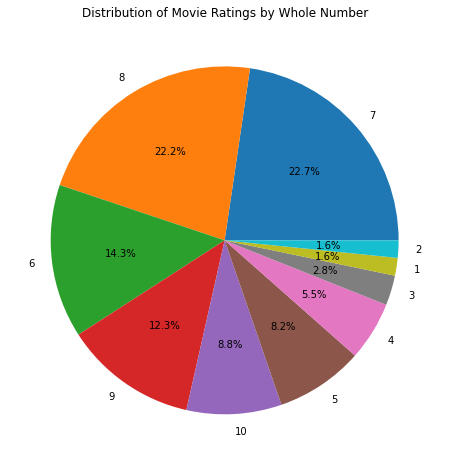

In [16]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df['rating_group'] = pd.cut(df['User_Rating'], bins=bins, labels=range(1, 11))
rating_counts = df['rating_group'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Movie Ratings by Whole Number')
plt.show()

#### WordCloud

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string
import re

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower().strip()
    # Remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Join tokens back into a string
    text = ' '.join(tokens)

    return text

df2['review_processed'] = df2['Review_Title'].apply(lambda x: preprocess_text(x))

WordCloud For Review Title


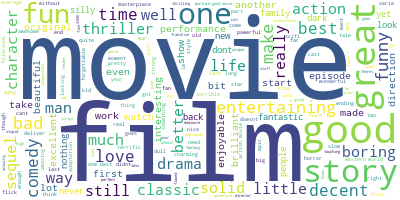

In [28]:
long_string = ','.join(list(df2['review_processed'].values))

print("WordCloud For Review Title")
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

WordCloud For Movie Description


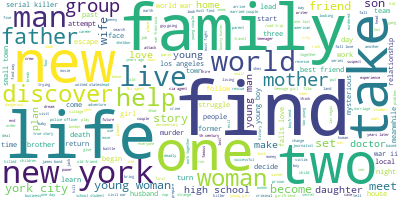

In [31]:
df['Description'] = df['Description'].fillna("")
df['desc_processed'] = df['Description'].apply(lambda x: preprocess_text(x))

long_string = ','.join(list(df['desc_processed'].values))

print("WordCloud For Movie Description")
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()